In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [39]:
#.txt file used from moodle
#please change path if required
file_path = '/content/drive/MyDrive/ColabNotebooks/MI_timesteps.txt'  # Update with your actual file path

# Read the data into a DataFrame
data = np.genfromtxt(file_path,  filling_values=0)
print(data.shape)

(14002, 10)


In [50]:
M = data.shape[0] - 1000

# Initialize a matrix with zeros
num_dimensions = 3
window_size = 351
matrix_shape = (M, num_dimensions * window_size)
new_matrix = np.zeros(matrix_shape)

for row in range(M):
    start_index = row
    end_index = row + window_size
    new_matrix[row] = data[start_index:end_index, 1:4].flatten()

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(new_matrix)
print(pc.shape)


(13002, 3)


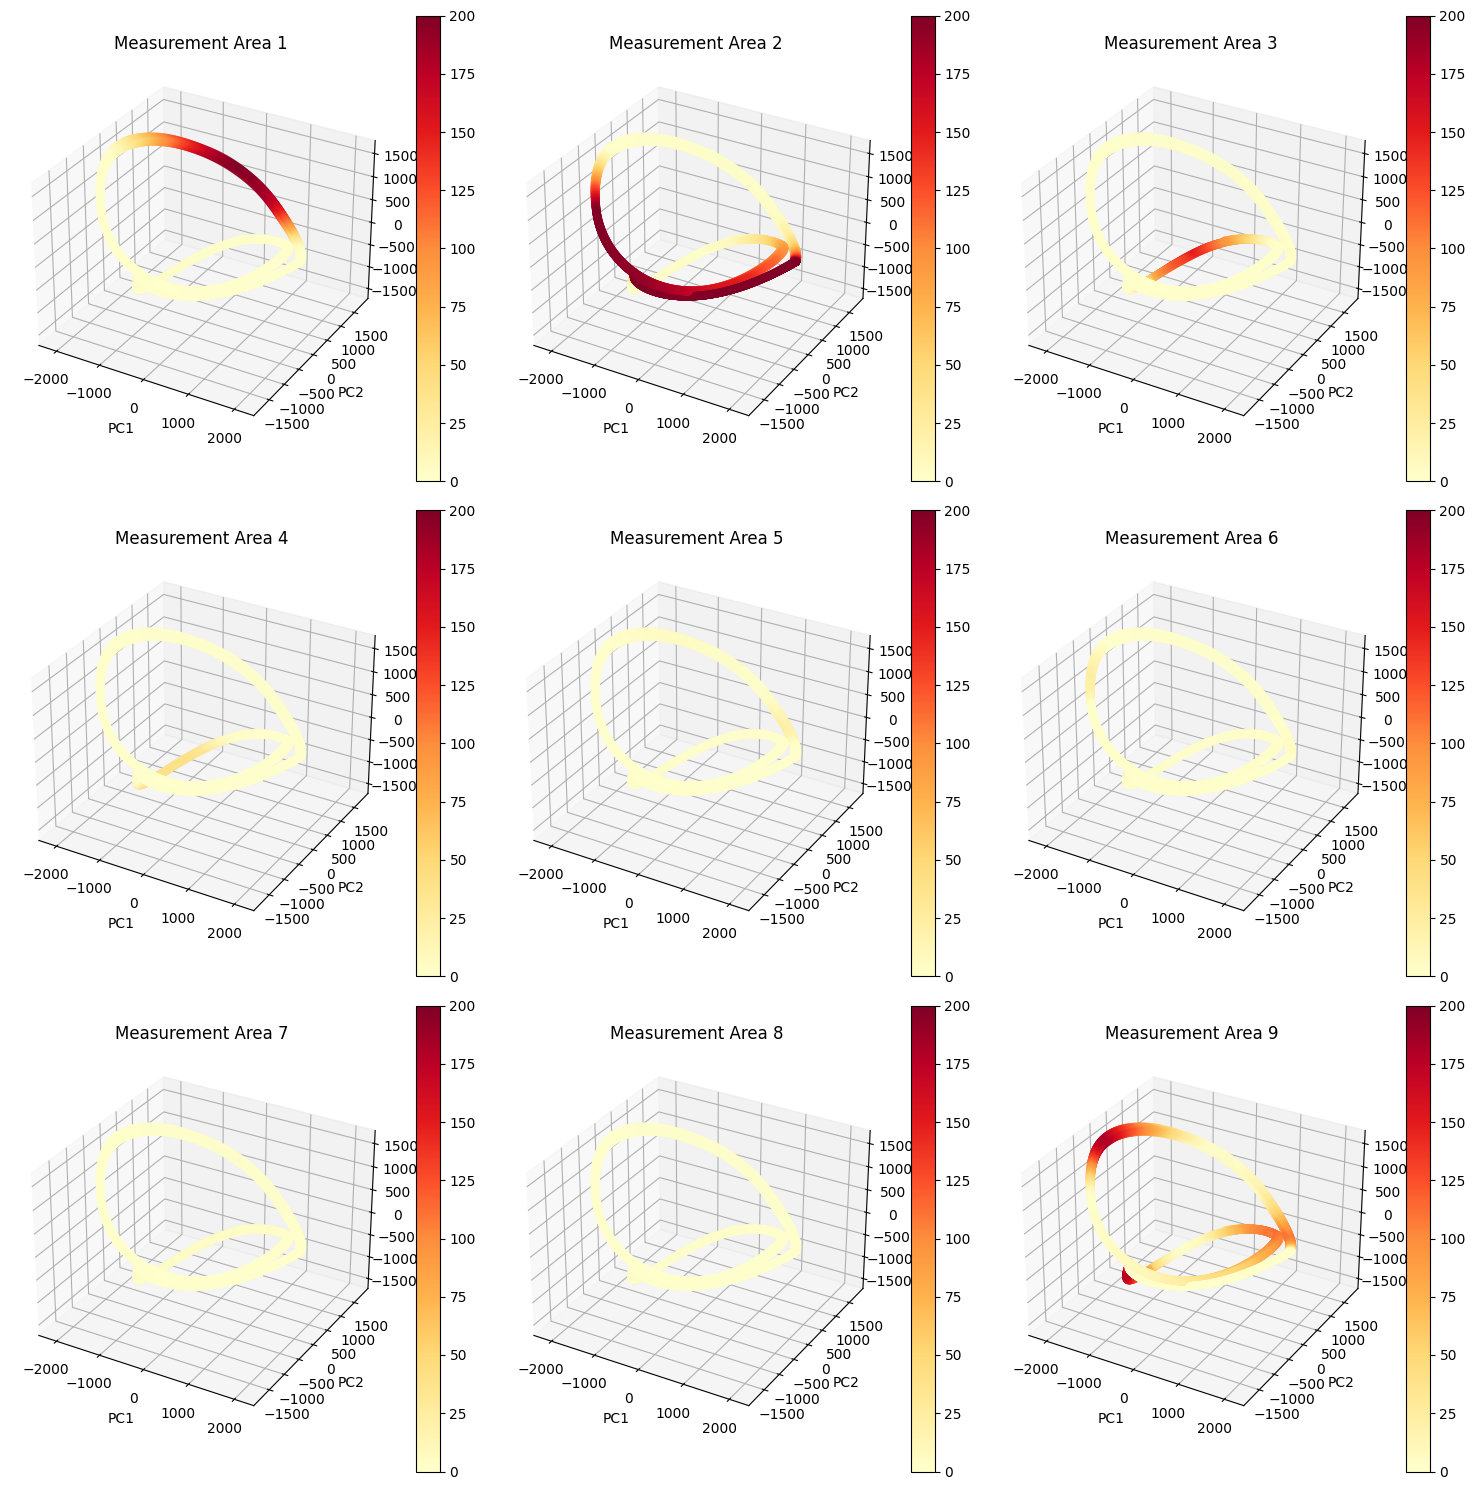

In [52]:

fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, ax in enumerate(axs):
    t = ax.scatter(pc[:,0], pc[:,1], pc[:,2], c = data[:pc.shape[0], i + 1], cmap=plt.get_cmap("YlOrRd"), norm=clt.Normalize(vmin=0, vmax=200))
    ax.set_title(f"Measurement Area {i + 1}")
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    fig.colorbar(t, ax=ax)
plt.tight_layout()

plt.show()

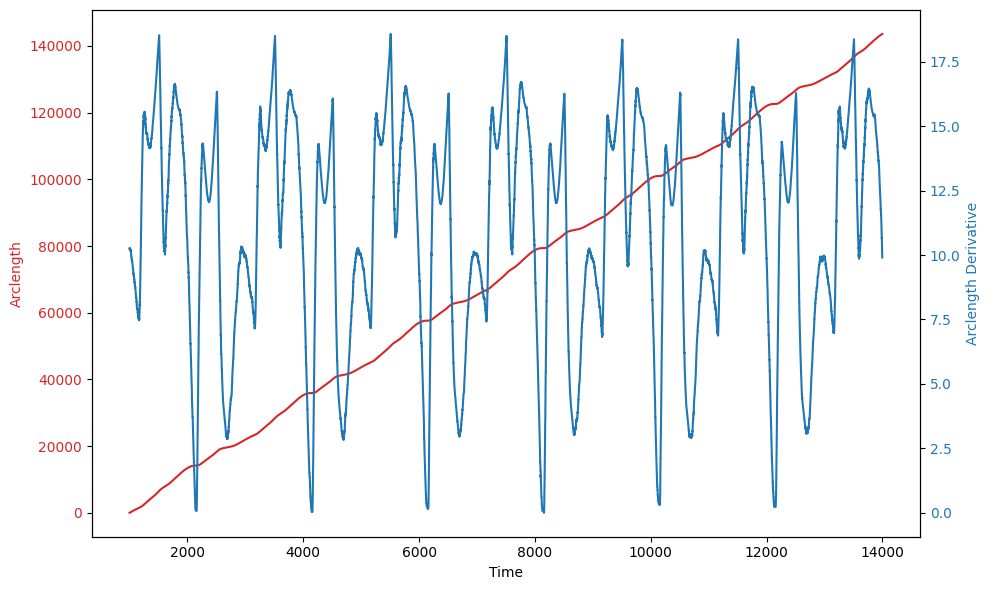

In [61]:
# Calculate Euclidean distances between consecutive points in PCA space
distances = np.sqrt(np.sum(np.diff(pc, axis=0)**2, axis=1))

# Calculate arclength as the cumulative sum of distances
arclength = np.cumsum(distances)

# Use time information to determine time steps
time_steps = data[:13001, 0]  # Assuming time information is in the first column of 'data'

# Approximate the derivative of arclength over time
arclength_derivative = np.diff(arclength) / np.diff(time_steps)

# Plot the arclength and its derivative over time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Arclength', color=color)
ax1.plot(time_steps, arclength, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Arclength Derivative', color=color)
ax2.plot(time_steps[:-1], arclength_derivative, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=2.28518e-50): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


ValueError: x and y must have same first dimension, but have shapes (14001,) and (14002,)

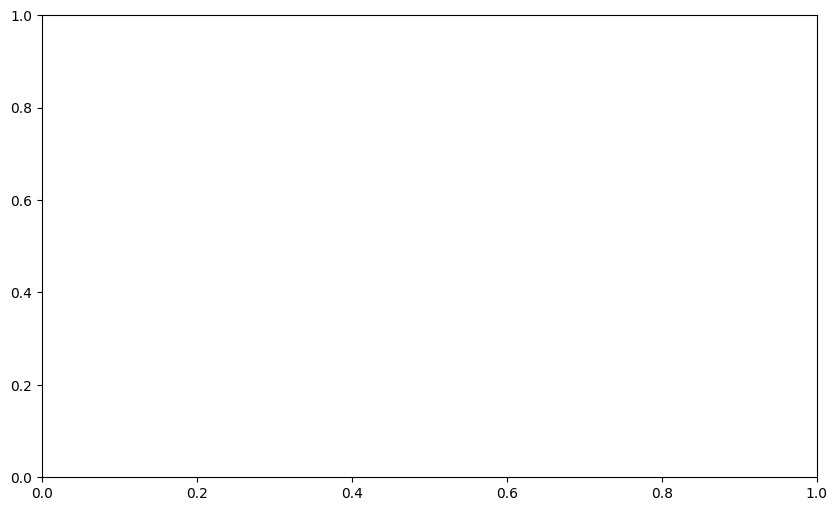

In [71]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf


# Integrate the learned vector field to obtain arclength values
arclength_prediction = cumtrapz(arclength_derivative, initial=0)  # Integration using cumtrapz
utilization_column_index = 1  # Adjust this based on your actual data structure
# Extract the utilization data from the specific column
utilization_data_variable = data[:, utilization_column_index]
# Map arclength values back to utilization values using RBF interpolation
rbf = Rbf(arclength, utilization_data_variable[0:13001], function='linear')
utilization_prediction = rbf(arclength_prediction)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the given utilization data
ax.plot(time_steps, utilization_data_variable, label='Given Data', color='blue', linestyle='--')

# Plot the predicted utilization values
ax.plot(time_steps[-1] + np.arange(1, 15), utilization_prediction, label='Predicted Data', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Utilization')
ax.legend()
plt.show()


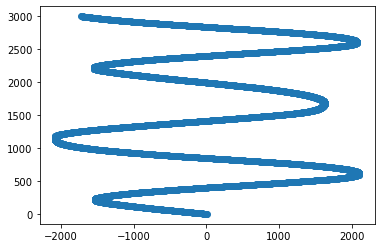

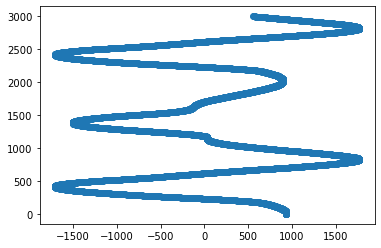

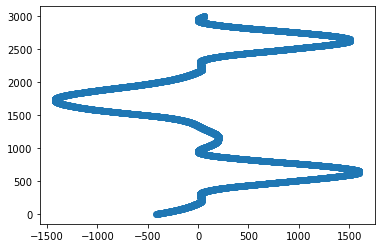

In [ ]:
for i in range(3):
    time = np.arange(3000)
    plt.plot(pc[:3000,i], time, 'o');
    plt.show()